# HidroAgro Online Training Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [10]:
online = pd.read_csv('/Users/ari/Documents/Hidroponik/Database/online_training.csv', index_col=0)
online.head(5)

,Name,Age,Gender,Street,City,Province,Email,Resources,Goal
0,Rafi Ihsan halimsyah Wildan,18,Male,Pondok pesantren ngalah asrama G Purwosari Pas...,Pasuruan,East Java,rafi.wildan23@gmail.com,Instagram,Learning Hydroponic for Beginner
1,Dimas Gumilang,18,Male,Depok,Depok,West Java,dimasgum22@gmail.com,Instagram,Learning Hydroponic for Beginner
2,M Ridwan Kurniawan,18,Male,Komplek griya permata kelurahan tabing banda g...,Padang,West Sumatra,mridwankurniawan21@gmail.com,Instagram,Learning Hydroponic for Industry
3,Sitti Ruqayya Marham,19,Female,Desa Bambadaru kecamatan tobadak kabupaten Mam...,Central Mamuju,West Sulawesi,struqayya@gmail.com,Instagram,Learning Hydroponic for Beginner
4,Entry bayu aji,19,Male,"Kadipirocinan rt-6 rw-2, wadunggetas, wonosari...",Klaten,Central Java,entrybayu000@gmail.com,Instagram,Learning Hydroponic for Industry


In [11]:
# Check any NaN values
print(online.info())
print('\n')
print(online.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 33
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       131 non-null    object
 1   Age        131 non-null    int64 
 2   Gender     131 non-null    object
 3   Street     131 non-null    object
 4   City       131 non-null    object
 5   Province   131 non-null    object
 6   Email      131 non-null    object
 7   Resources  131 non-null    object
 8   Goal       131 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.2+ KB
None


Index(['Name', 'Age', 'Gender', 'Street', 'City', 'Province', 'Email',
       'Resources', 'Goal'],
      dtype='object')


In [12]:
# Check the description 
online.describe()

,Age
count,131.000000
mean,29.183206
std,8.837683
min,17.000000
25%,23.000000
50%,27.000000
75%,33.000000
max,55.000000


In [13]:
# The probability Mass Function in Gender
gender = online['Gender']
pmf_gender = Pmf.from_seq(gender)
pmf_gender

,probs
Female,0.175573
Male,0.824427


In [14]:
# Compute the usage of Resources by Male
male = online[online['Gender']=='Male']['Resources'].value_counts(normalize=True)
print(male)

print('\n')

# Compute the usage of Resources by Female
female = online[online['Gender']=='Female']['Resources'].value_counts(normalize=True)
print(female)

Instagram          0.675926
Facebook           0.148148
Youtube            0.101852
Friend             0.037037
Internet           0.018519
Other Resources    0.018519
Name: Resources, dtype: float64


Instagram          0.695652
Facebook           0.130435
Youtube            0.086957
Other Resources    0.043478
Internet           0.043478
Name: Resources, dtype: float64


In [15]:
# The mean of Age in each gender
online[['Gender','Age']].groupby(['Gender'], as_index=False).mean().sort_values('Age', ascending=False)

,Gender,Age
1,Male,29.564815
0,Female,27.391304


In [16]:
# The mean of Age in each goal
online[['Goal','Age']].groupby(['Goal'], as_index=False).mean().sort_values('Age', ascending=False)

,Goal,Age
1,Learning Hydroponic for Hobby,31.444444
2,Learning Hydroponic for Industry,30.571429
0,Learning Hydroponic for Beginner,28.390805


## Analyse by Visualizing Data

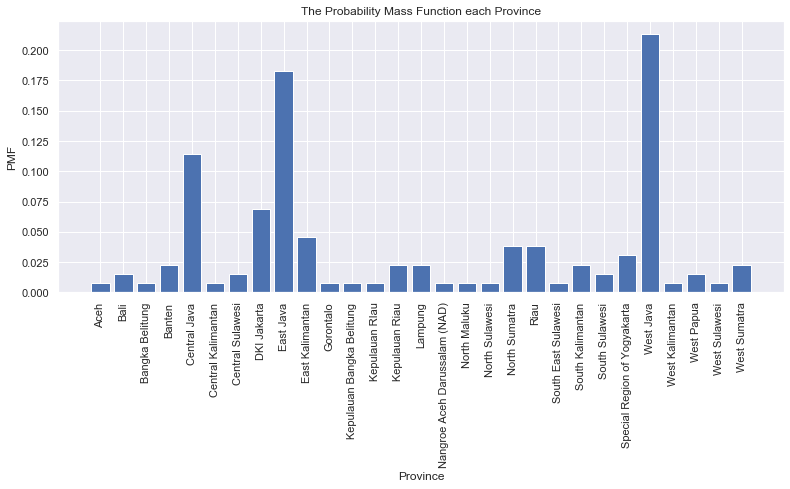

In [17]:
# The Probability Mass Function of each province
sns.set()
province = online['Province']
pmf_province = Pmf.from_seq(province, normalize=True)
plt.figure(figsize=(13,5))
pmf_province.bar()
plt.xlabel('Province')
plt.ylabel('PMF')
plt.title('The Probability Mass Function each Province')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'The Resources that are Used by Participants')

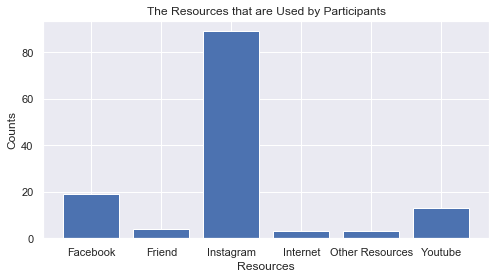

In [18]:
# The PMF in Resources and visualize into bar chart
resources = online['Resources']
pmf_resources = Pmf.from_seq(resources, normalize=False)
plt.figure(figsize=(8,4))
pmf_resources.bar()
plt.xlabel('Resources')
plt.ylabel('Counts')
plt.title('The Resources that are Used by Participants')

In [19]:
# Create a frequency table between gender and resources
gender_resources = pd.crosstab(online.Gender, online.Resources)
gender_resources

Resources,Facebook,Friend,Instagram,Internet,Other Resources,Youtube
Gender,,,,,,
Female,3,0,16,1,1,2
Male,16,4,73,2,2,11


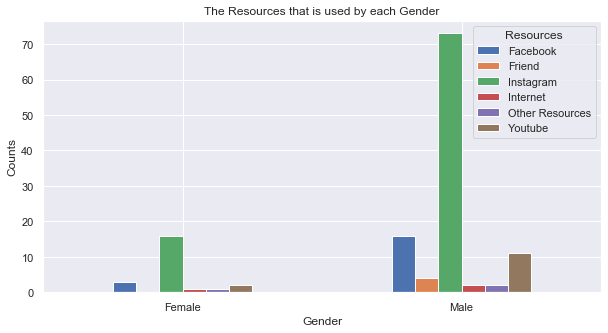

In [20]:
# Visualize the gender_resources
gender_resources.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('Counts')
plt.title('The Resources that is used by each Gender')
plt.show()

In [21]:
# Create a frequency table between Gender and Goal
gender_goal = pd.crosstab(online.Gender, online.Goal)
gender_goal

Goal,Learning Hydroponic for Beginner,Learning Hydroponic for Hobby,Learning Hydroponic for Industry
Gender,,,
Female,14,4,5
Male,73,5,30


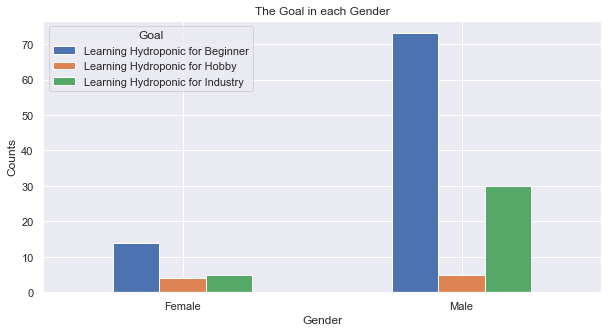

In [22]:
# Visualize the gender_goal
gender_goal.plot(kind='bar', figsize=(10,5))
plt.title('The Goal in each Gender')
plt.xticks(rotation=0)
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Goal of Participant in each Age')

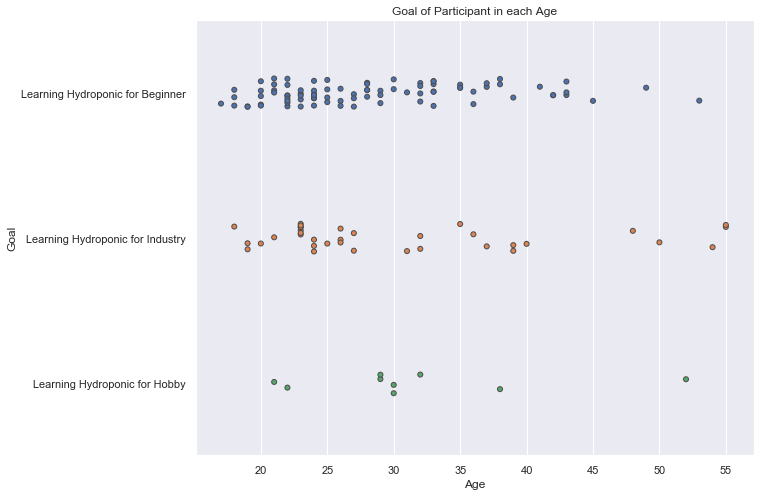

In [23]:
# Relation between Age and Goal in Online Training
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x=online['Age'], y=online['Goal'], jitter=True, linewidth=1)
ax.set_title('Goal of Participant in each Age')

Text(0.5, 1.0, 'The Relation of Age  in each Province')

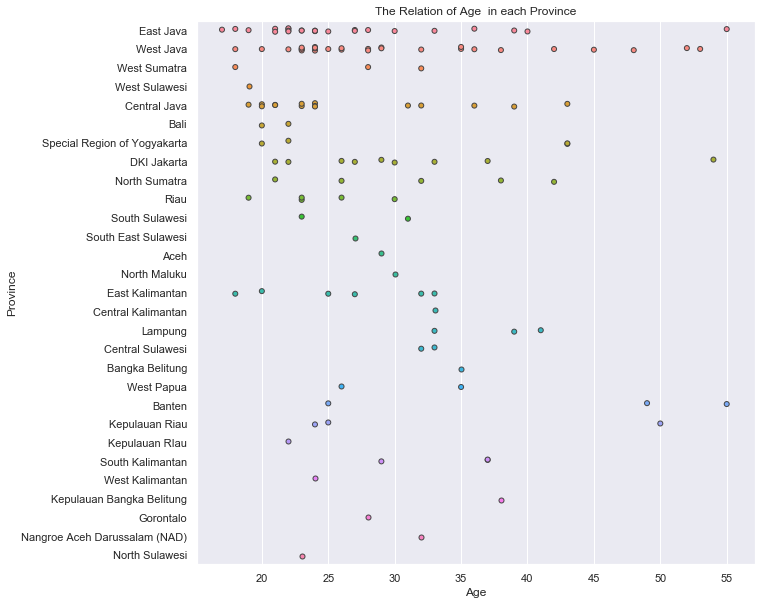

In [24]:
# Relation between Age and Province 
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.stripplot(x=online['Age'], y=online['Province'], jitter=True, linewidth=1)
ax.set_title('The Relation of Age  in each Province')

## Prediction 

Classification task: a supervised learning task is a classification task if the target variable consists of categories ('click' or 'not)

Regression task: a supervised learning task is a regression task if the target variable is continuously varying variable (price of house) or an ordered categorical variable such as 'quality rating of wine'.

### KNeighbors

KNN is a method of machine learning to predict by classification the target 

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [26]:
# Check the type of columns
online.dtypes

Name         object
Age           int64
Gender       object
Street       object
City         object
Province     object
Email        object
Resources    object
Goal         object
dtype: object

In [27]:
# Select the possibility column to make a prediction
# Take Age, Gender, Province, Resources and Goal
p_online = online.drop(['Name','Street','Email'], axis=1)

In [28]:
p_online.head()

,Age,Gender,City,Province,Resources,Goal
0,18,Male,Pasuruan,East Java,Instagram,Learning Hydroponic for Beginner
1,18,Male,Depok,West Java,Instagram,Learning Hydroponic for Beginner
2,18,Male,Padang,West Sumatra,Instagram,Learning Hydroponic for Industry
3,19,Female,Central Mamuju,West Sulawesi,Instagram,Learning Hydroponic for Beginner
4,19,Male,Klaten,Central Java,Instagram,Learning Hydroponic for Industry


In [29]:
p_online.Province.unique()

array(['East Java', 'West Java', 'West Sumatra', 'West Sulawesi',
       'Central Java', 'Bali', 'Special Region of Yogyakarta',
       'DKI Jakarta', 'North Sumatra', 'Riau', 'South Sulawesi',
       'South East Sulawesi', 'Aceh', 'North Maluku', 'East Kalimantan',
       'Central Kalimantan', 'Lampung', 'Central Sulawesi',
       'Bangka Belitung', 'West Papua', 'Banten', 'Kepulauan Riau',
       'Kepulauan RIau', 'South Kalimantan', 'West Kalimantan',
       'Kepulauan Bangka Belitung', 'Gorontalo',
       'Nangroe Aceh Darussalam (NAD)', 'North Sulawesi'], dtype=object)

In [30]:
# Converting string label 
p_online_en = p_online[['Gender','Province','Resources']].apply(LabelEncoder().fit_transform)
p_online_en = pd.concat([p_online_en, p_online[['Age','Goal']]], axis=1)
print(p_online_en.shape)
p_online_en.head()

(131, 5)


,Gender,Province,Resources,Age,Goal
0,1,8,2,18,Learning Hydroponic for Beginner
1,1,24,2,18,Learning Hydroponic for Beginner
2,1,28,2,18,Learning Hydroponic for Industry
3,0,27,2,19,Learning Hydroponic for Beginner
4,1,4,2,19,Learning Hydroponic for Industry


In [31]:
# Generating Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Create feature and target array
X = p_online_en.drop('Goal', axis=1).values
y = p_online_en['Goal'].values

# Train the model using training set
model.fit(X, y)

print(model.score(X,y))

predicted = model.predict([[0,24,2,23]])

print(predicted)

0.7557251908396947
['Learning Hydroponic for Beginner']


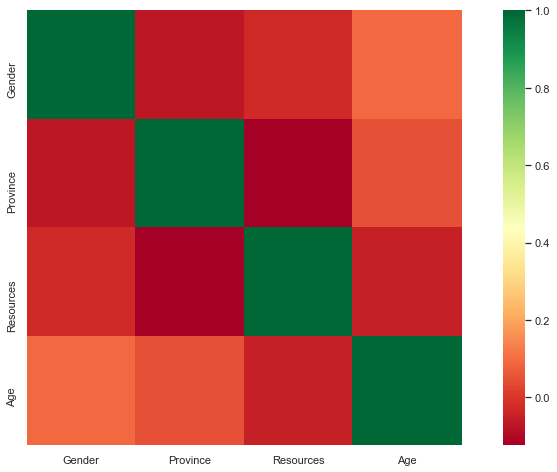

In [32]:
# Find the correlation
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(p_online_en.corr(), square=True, cmap='RdYlGn', ax=ax)

### Train/Test Split + Fit/Predict/Accuracy 

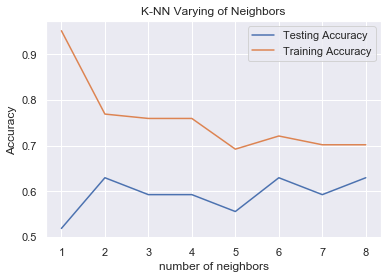

In [33]:
# Setup array to store the train and test accuracy
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Create feature and target array
    X = p_online_en.drop('Goal', axis=1).values
    y = p_online_en['Goal'].values
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    # Fit the classifier to training data
    model.fit(X_train, y_train)
    
    # Compute accuracy on training set
    train_accuracy[i] = model.score(X_train, y_train)
    
    # Compute accuracy on testing set
    test_accuracy[i] = model.score(X_test, y_test)
    
# Generate plot
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('K-NN Varying of Neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target array
X = p_online_en.drop('Goal', axis=1).values
y = p_online_en['Goal'].values

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Create KNN classifier with 3 neighbors
model = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to training data
model.fit(X_train, y_train)

# print the accuracy
print(model.score(X_test, y_test))

predicted= model.predict([[0,24,2,23]])
print(predicted)

print('\n')

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

0.6296296296296297
['Learning Hydroponic for Industry']


                                  precision    recall  f1-score   support

Learning Hydroponic for Beginner       0.70      0.78      0.74        18
   Learning Hydroponic for Hobby       0.00      0.00      0.00         2
Learning Hydroponic for Industry       0.60      0.43      0.50         7

                        accuracy                           0.63        27
                       macro avg       0.43      0.40      0.41        27
                    weighted avg       0.62      0.63      0.62        27



### Scaling the data to imporve the accuracy 

In [35]:
from sklearn.preprocessing import scale
Xs = scale(X)

# Split into training and test data
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

# Create KNN classifier with 6 neighbors
model = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to training data
model.fit(Xs_train, y_train)

# print the accuracy
print(model.score(Xs_test, y_test))

predicted= model.predict([[0,24,2,23]])
print(predicted)

print('\n')

y_pred = model.predict(Xs_test)
print(classification_report(y_test, y_pred))

0.7407407407407407
['Learning Hydroponic for Beginner']


                                  precision    recall  f1-score   support

Learning Hydroponic for Beginner       0.73      1.00      0.84        19
   Learning Hydroponic for Hobby       0.00      0.00      0.00         1
Learning Hydroponic for Industry       1.00      0.14      0.25         7

                        accuracy                           0.74        27
                       macro avg       0.58      0.38      0.36        27
                    weighted avg       0.77      0.74      0.66        27



Conclusion the KNN classification
- KNN Classification without n_neighbors distribution and train_test_split give the accuracy around 75.57%
- KNN Classification with n_neighbors distribution and train_test_split give the accuracy around 62.95% which is bad accuracy
- KNN Classification with n_neighbors distribution, train_test_split and scale give the accuracy around 74.07% which is good.

### Logistic Regression

Logistic Regression performs better than K-NN(with or without scaling) 

Logistic Regression can be used for classification such as the quality of wine

Logistic Regression doesn't improve its performance by scaling the target variable. The reason, if the predicted varibale has the large range, it won't effect the target variable

In [36]:
from sklearn.linear_model import LogisticRegression

# Create feature and target array
X = p_online_en.drop('Goal', axis=1).values
y = p_online_en['Goal'].values

Xs = scale(X)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Logistic Regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

predicted = model.predict([[0,24,2,23]])
print(predicted)

# Classification report
y_pred = model.predict(X_test)

# Test data
print('Logistic Regression for the test data',model.score(X_test, y_test))
print('\n')
print(classification_report(y_test, y_pred))

['Learning Hydroponic for Beginner']
Logistic Regression for the test data 0.6666666666666666


                                  precision    recall  f1-score   support

Learning Hydroponic for Beginner       0.69      0.95      0.80        19
   Learning Hydroponic for Hobby       0.00      0.00      0.00         1
Learning Hydroponic for Industry       0.00      0.00      0.00         7

                        accuracy                           0.67        27
                       macro avg       0.23      0.32      0.27        27
                    weighted avg       0.49      0.67      0.56        27

